# Pulling data from the advertising spots endpoint using pybarb

In this demo we will show you how to pull data from the advertising spots endpoint and then manipulate it using the pybarb library. To show this we will demonstrate a typical media agency use-case in which an agency has run a TV advertising campaign for their client. As part of their post campaign analysis they would like to understand how well the adverts have performed

1. By TV station
2. By audience 
3. And over time.   

Note the full API documentation can be found [here](https://barb-api.co.uk/api-docs). 

It might also be useful to consult the [Getting Started](https://barb-api.co.uk/api-docs#section/Getting-started) section for information about authentication and basic API usage.


## Querying the API with pybarb

First we connect to the API using the `pybarb` package as described in "Connecting to the Barb API using Python". 

In [13]:
import json
import pybarb as pb

# Set the working directory
working_directory = '/Users/simon_business/Documents/disposable/clients/BARB/'

# Get the access token
with open(working_directory + "creds.json") as file:
    creds = json.load(file)

# Create a BarbAPI object and connect
barb_api = pb.BarbAPI(creds)
barb_api.connect()


## Get data from the API

Let's say as the media agency Mindshare we are interested in the Persil campaign that was shown over for our client Unilever. If we don't have it already, our first use of the API is to find out our own buyer name.

### The buyer name

In [14]:
barb_api.list_buyers("mindshare")

['mindshare',
 'mindshare_direct_(bu',
 'mindshare_ireland',
 'mindshare_media_irel',
 'mindshare_media_uk_l',
 'unilever_mindshare_(']

### The advertiser name

We could bring back all the data for Mindshare but it would be better to limit it to the spots that were placed for Unilever. For this we need the right name for Unilever home products. 

In [15]:
barb_api.list_advertisers("unilever")

['UNILEVER_BESTFOODS',
 'UNILEVER_ICE_CREAM_&',
 'UNILEVER_IRELAND',
 'UNILEVER_UK_HOME_&_P',
 'UNILEVER_UK_LIMITED']

### The panel code

Finally, we are only interested in the BBC Network panel so we can use the [panels](https://barb-api.co.uk/api-docs#tag/Metadata/operation/panelsList) end point to get the right code. We need to find the right name for the panel.

In [16]:
barb_api.list_panels("bbc")

['BBC Network',
 'BBC East Region',
 'BBC West Region',
 'BBC South West Region',
 'BBC South Region',
 'BBC Yorkshire & Lincolnshire',
 'BBC North East & Cumbria',
 'BBC North West Region',
 'BBC Scotland Region',
 'BBC Ulster Region',
 'BBC Wales Region',
 'BBC Midlands West',
 'BBC Midlands East',
 'BBC London',
 'BBC South East']

### Querying the advertising spots endpoint

Now we know all the relevant metadata we can query the advertising spots endpoint. This can be done very simply using pybarb's `advertising_spots` method. 

In [17]:
spot_data = barb_api.advertising_spots(min_transmission_date = "2022-01-01",
                           max_transmission_date = "2022-04-01", 
                           buyer =  "mindshare_media_uk_l", 
                           advertiser = "UNILEVER_UK_HOME_&_P",
                           panel="BBC Network")

## Accessing the data

The raw data is stored in the `api_response_data` attribute of the resulting object (in this case the object named `spot_data`)

In [18]:
spot_data.api_response_data

{'endpoint': 'advertising_spots',
 'events': [{'panel': {'panel_code': 50,
    'panel_region': 'BBC Network',
    'is_macro_region': False},
   'station': {'station_code': 4870, 'station_name': 'Sky History +1'},
   'spot_type': 'spot',
   'spot_start_datetime': {'barb_reporting_datetime': '2022-03-14T21:13:14',
    'barb_polling_datetime': '2022-03-14 21:13:14',
    'standard_datetime': '2022-03-14 21:13:14'},
   'spot_duration': 30,
   'preceding_programme_name': 'AMERICAN PICKERS 18B',
   'succeeding_programme_name': 'AMERICAN PICKERS 18B',
   'break_type': 'centre break',
   'broadcaster_spot_number': '889367209',
   'commercial_number': 'TAGDVGB435030',
   'clearcast_information': {'match_group_code': 0,
    'match_group_name': 'England, Scotland and Wales',
    'buyer_code': 'B000925',
    'buyer_name': 'MINDSHARE MEDIA UK L',
    'advertiser_code': 'A004642',
    'advertiser_name': 'UNILEVER UK HOME & P',
    'holding_company_code': 'H001102',
    'holding_company_name': 'UNILEV

However it is easier to access it as a dataframe. To do this, we can use the `to_dataframe()` method, which flattens the nested json structure.

In [19]:
spot_df = spot_data.to_dataframe()
spot_df


,panel_region,station_name,spot_type,spot_start_datetime,spot_duration,preceding_programme_name,succeeding_programme_name,break_type,position_in_break,broadcaster_spot_number,...,clearcast_buyer_code,clearcast_buyer_name,clearcast_advertiser_code,clearcast_advertiser_name,campaign_approval_id,sales_house_name,audience_size_hundreds,date_of_transmission,audience_name,audience_target_size_hundreds
0,BBC Network,Discovery,spot,2022-03-14 18:31:40,30,FAST N' LOUD (SEASON 6),FAST N' LOUD (SEASON 6),centre break,last,884777727,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Sky Media,102,2022-03-14,All Homes,270890
1,BBC Network,Discovery,spot,2022-03-14 18:31:40,30,FAST N' LOUD (SEASON 6),FAST N' LOUD (SEASON 6),centre break,last,884777727,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Sky Media,102,2022-03-14,All Adults,513120
2,BBC Network,Discovery,spot,2022-03-14 18:31:40,30,FAST N' LOUD (SEASON 6),FAST N' LOUD (SEASON 6),centre break,last,884777727,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Sky Media,102,2022-03-14,All Men,250100
3,BBC Network,Discovery,spot,2022-03-14 18:31:40,30,FAST N' LOUD (SEASON 6),FAST N' LOUD (SEASON 6),centre break,last,884777727,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Sky Media,102,2022-03-14,All Houseperson,270890
4,BBC Network,Discovery,spot,2022-03-14 18:31:40,30,FAST N' LOUD (SEASON 6),FAST N' LOUD (SEASON 6),centre break,last,884777727,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Sky Media,102,2022-03-14,Adults 35-44,81760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115191,BBC Network,E4,spot,2022-03-27 12:38:20,30,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,centre break,other,181298380,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Channel 4 Sales,176,2022-03-27,Adults working full-time,247260
115192,BBC Network,E4,spot,2022-03-27 12:38:20,30,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,centre break,other,181298380,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Channel 4 Sales,45,2022-03-27,Men working full-time,145550
115193,BBC Network,E4,spot,2022-03-27 12:38:20,30,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,centre break,other,181298380,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Channel 4 Sales,131,2022-03-27,Houseperson working full-time,109330
115194,BBC Network,E4,spot,2022-03-27 12:38:20,30,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,RAMSAY'S KITCHEN NIGHTMARES USA V - Leon,centre break,other,181298380,...,B000925,MINDSHARE MEDIA UK L,A004642,UNILEVER UK HOME & P,1048980.0,Channel 4 Sales,41,2022-03-27,Houseperson with children 0-15,69670


## Manipulating the data

We can also get a pivot of the data which turns the audiences into columns.

In [20]:
spot_data.audience_pivot()

audience_name                                                                ABC1 Adults, Lightest Third  \
panel_region station_name date_of_transmission clearcast_commercial_title                                  
BBC Network  4Music       2022-03-14           Dove Reverse Selfie                                  63.0   
                                               Persil Gaia 30                                        0.0   
                          2022-03-15           Dove Reverse Selfie                                  41.0   
                          2022-03-16           Dove Reverse Selfie                                  15.0   
                                               Persil Gaia 30                                        0.0   
...                                                                                                  ...   
             Zee Cinema   2022-03-27           Dove Reverse Selfie 30s                               0.0   
                                               Persil Gaia 30 NEW                                    0.0   
                          2022-03-29           Persil Gaia 30 NEW                                    0.0   
                          2022-03-31           Dove Gradual Self Tan Mousse                          0.0   
                                               Persil Gaia 30 NEW                                    0.0   

audience_name                                                                Adults 16-24  \
panel_region station_name date_of_transmission clearcast_commercial_title                   
BBC Network  4Music       2022-03-14           Dove Reverse Selfie                    0.0   
                                               Persil Gaia 30                        36.0   
                          2022-03-15           Dove Reverse Selfie                    0.0   
                          2022-03-16           Dove Reverse Selfie                  108.0   
                                               Persil Gaia 30                         0.0   
...                                                                                   ...   
             Zee Cinema   2022-03-27           Dove Reverse Selfie 30s                0.0   
                                               Persil Gaia 30 NEW                     0.0   
                          2022-03-29           Persil Gaia 30 NEW                     0.0   
                          2022-03-31           Dove Gradual Self Tan Mousse           0.0   
                                               Persil Gaia 30 NEW                     0.0   

audience_name                                                                Adults 16-34  \
panel_region station_name date_of_transmission clearcast_commercial_title                   
BBC Network  4Music       2022-03-14           Dove Reverse Selfie                  197.0   
                                               Persil Gaia 30                        36.0   
                          2022-03-15           Dove Reverse Selfie                  151.0   
                          2022-03-16           Dove Reverse Selfie                  369.0   
                                               Persil Gaia 30                         0.0   
...                                                                                   ...   
             Zee Cinema   2022-03-27           Dove Reverse Selfie 30s                0.0   
                                               Persil Gaia 30 NEW                     0.0   
                          2022-03-29           Persil Gaia 30 NEW                    31.0   
                          2022-03-31           Dove Gradual Self Tan Mousse          57.0   
                                               Persil Gaia 30 NEW                    57.0   

audience_name                                                                Adults 16-34, Lightest Third  \
panel_region station_name date_of_transmission clearcast_commercia

## Analysing the Persil campaign

### On average how did each station perform?

Let's limit the data to Persil adverts

In [21]:
import plotly.express as px
persil = spot_df[spot_df['clearcast_commercial_title'].str.contains("Persil")]
group_by_station = persil[persil['audience_name']=="All Homes"].groupby('station_name')['audience_size_hundreds'].mean().reset_index()

fig = px.bar(group_by_station[group_by_station["audience_size_hundreds"]>300], x='audience_size_hundreds', y='station_name', text_auto='.2s',
            title="Mean audience size per spot by station", height=1000)
fig.show()

### On average for each audience and station what percentage of the target audience was reached

We can use pandas to create a matrix where each row is a station and each column is an audience. The values in the matrix will be the mean percentage of the target audience reached by Persil commercials broadcast on the station.

In [22]:
persil=persil.assign(audience_penetration = persil['audience_size_hundreds']/persil['audience_target_size_hundreds'])
group_by_audience_and_station = persil.groupby(['audience_name', 'station_name'])['audience_penetration'].mean()
group_by_audience_and_station = group_by_audience_and_station[group_by_audience_and_station>0.003].unstack().fillna(0)
group_by_audience_and_station

station_name,Discovery,Pick,Sky Showcase,Channel 5,4Music,5ACTION,5STAR,5USA,CBS Reality,Challenge TV,...,MTV Hits,Movies 24,NOW 70s,Quest +1,Sky Cinema Action & Adventure,Sky Crime,Utsav Plus,W +1,Alibi,Eden
audience_name,,,,,,,,,,,,,,,,,,,,,
Adults 16-24,0.005945,0.003447,0.003346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults 16-34,0.000000,0.000000,0.000000,0.003522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults 18-20,0.000000,0.010350,0.007925,0.003746,0.004875,0.007525,0.008775,0.007030,0.005249,0.003550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults 21-24,0.013067,0.000000,0.004504,0.003974,0.003056,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults 35-44,0.000000,0.000000,0.000000,0.005883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults 45-49,0.000000,0.000000,0.000000,0.010080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults 45-54,0.000000,0.000000,0.000000,0.011160,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults 55-64,0.000000,0.000000,0.000000,0.014960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
Adults AB,0.000000,0.000000,0.000000,0.006954,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


This can be visualised using a seaborn clustermap

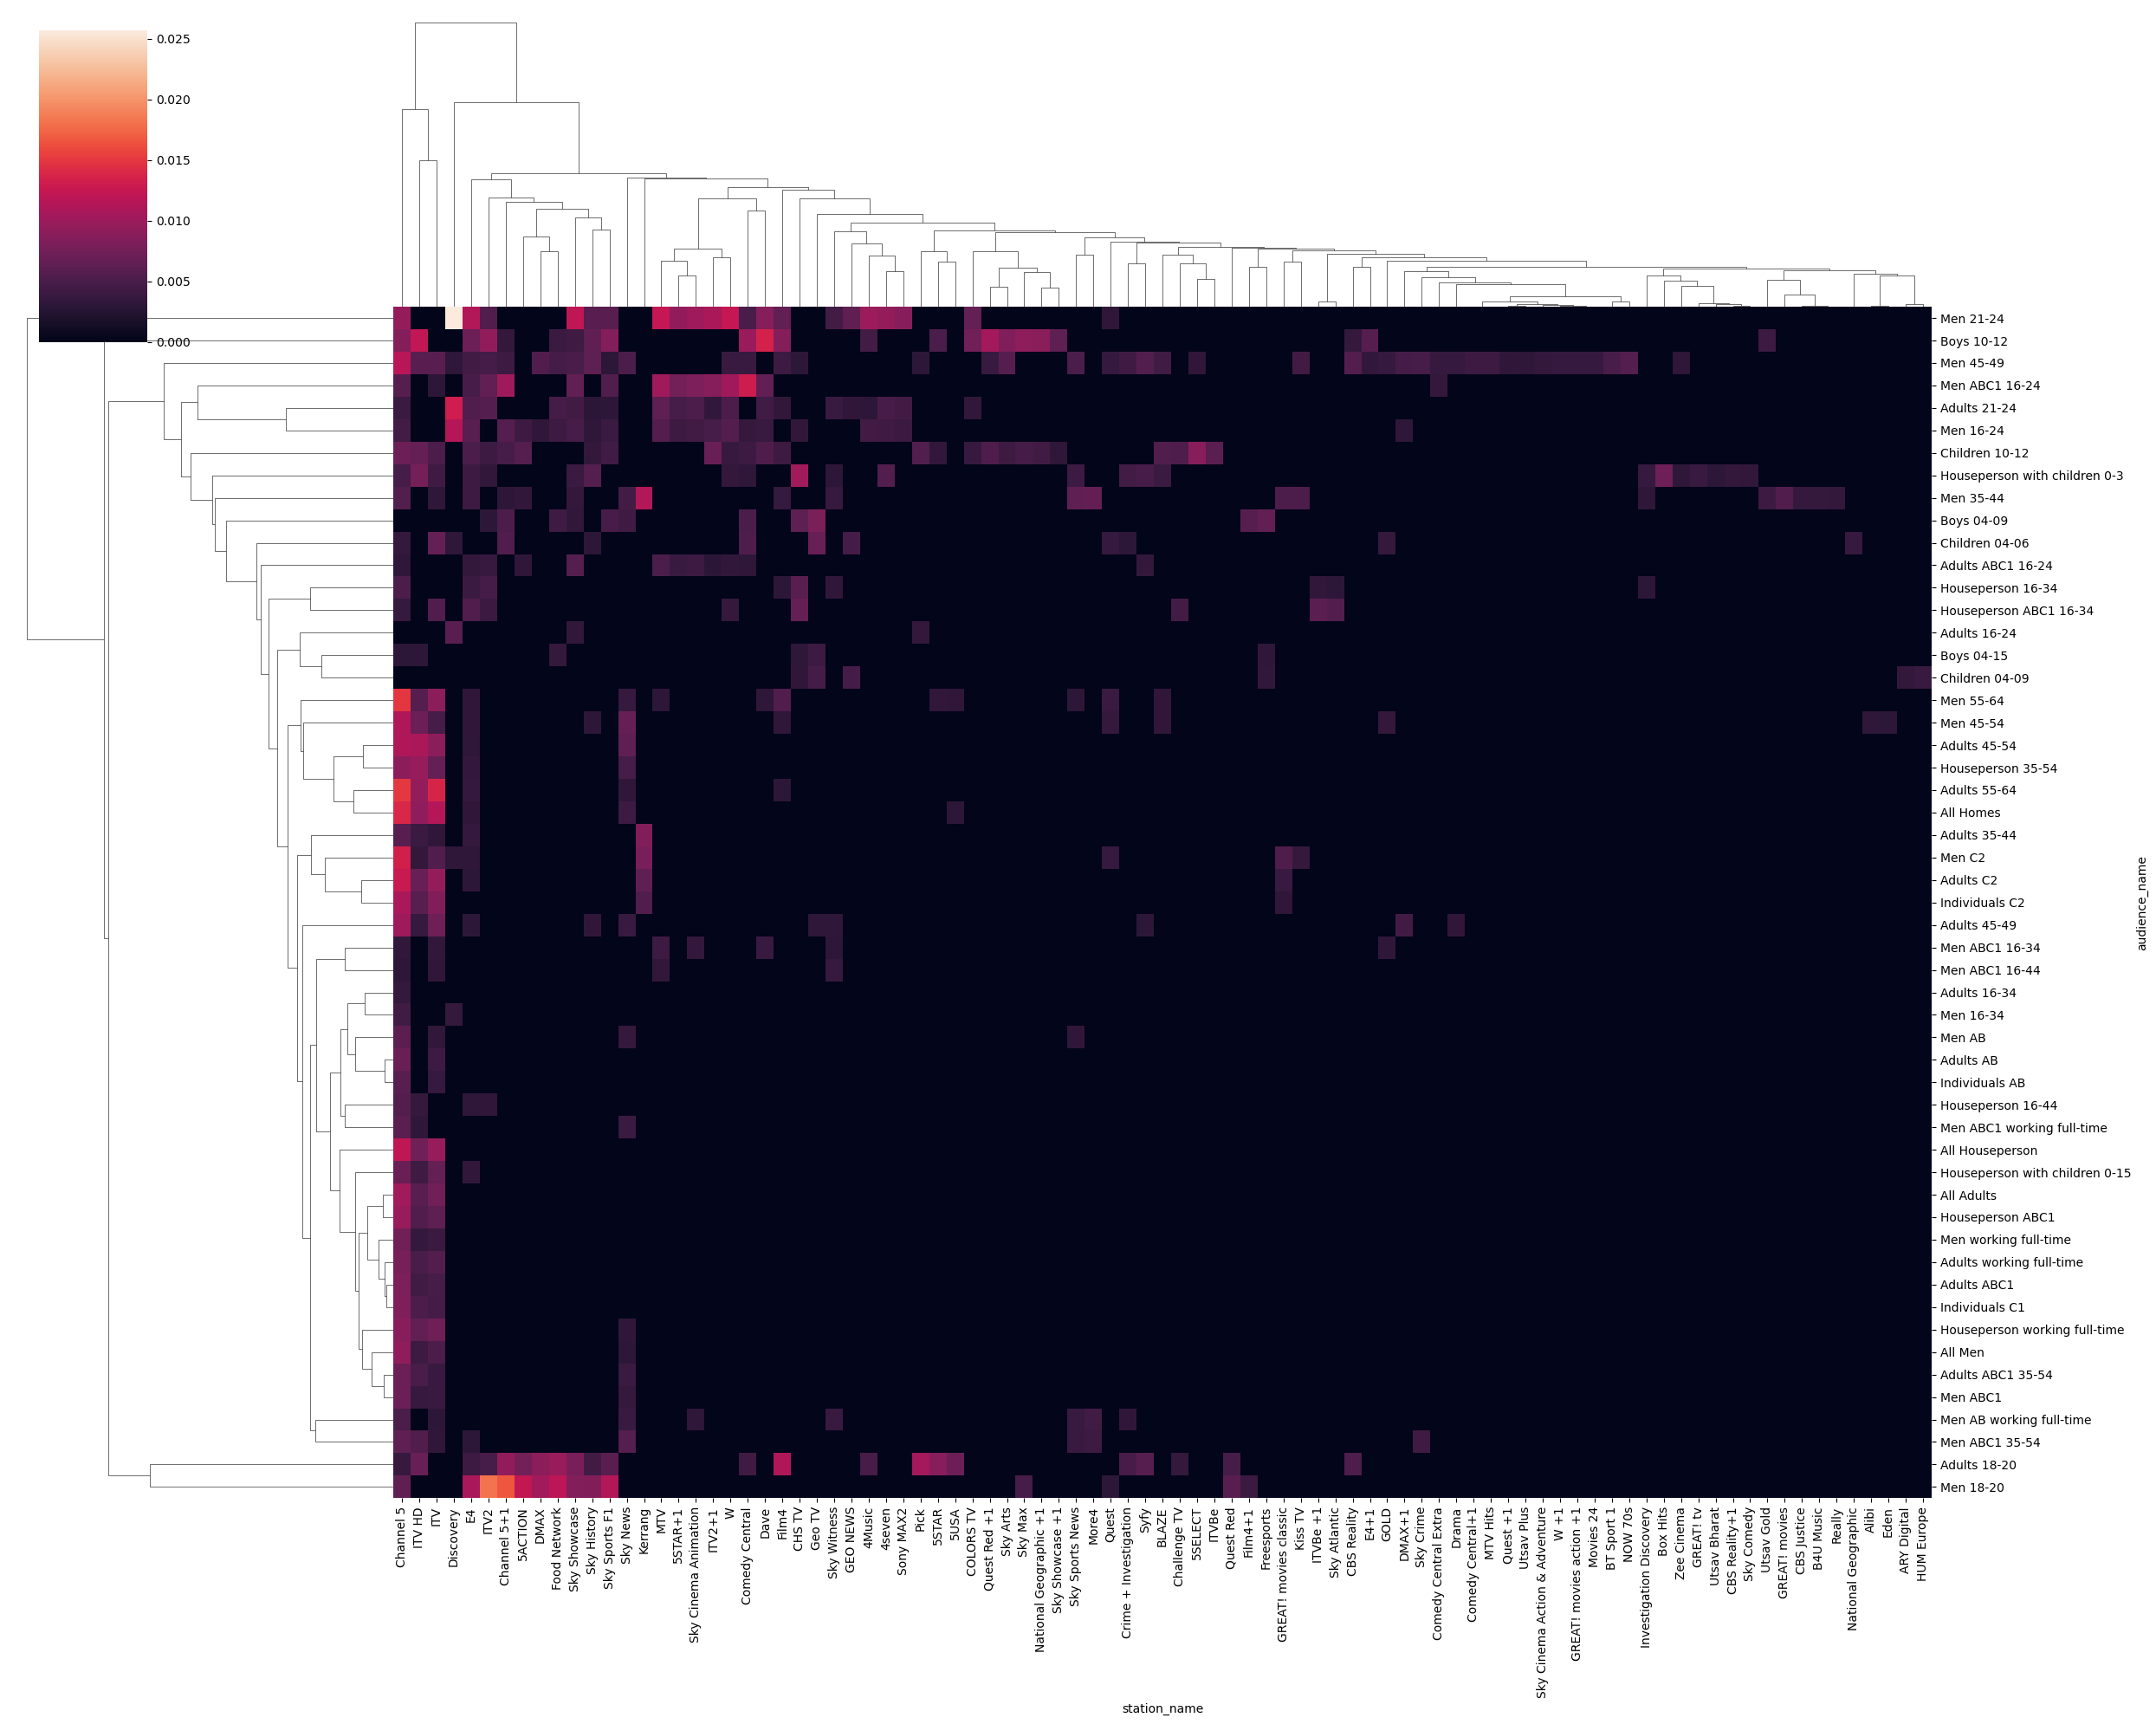

In [23]:
import seaborn as sns
_ = sns.clustermap(group_by_audience_and_station, figsize = (25,20))

## How did the spots do over time?

Say we wanted to focus in on Sky, and to look at how individual spots performed over time. We could do this with the following code:

In [24]:
persil_sky = spot_df[(spot_df['clearcast_commercial_title'].str.contains("Persil")) 
                   & (spot_df['audience_name']=='All Homes')
                   & (spot_df['station_name'].str.contains("Sky"))].sort_values(['station_name', 'spot_start_datetime'])

fig = px.scatter(persil_sky, x="spot_start_datetime", y="audience_size_hundreds", color="station_name", width = 1400, height = 600)
fig.update_traces(marker={'size': 10})

shapes=[dict(
        type='line',
        x0 = persil_sky['spot_start_datetime'].iloc[i],
        y0 = 0,
        x1 = persil_sky['spot_start_datetime'].iloc[i],
        y1 = persil_sky['audience_size_hundreds'].iloc[i],
        layer='below',
        line = dict(
            color = 'grey',
            width = 2
        )
    ) for i in range(len(persil_sky['audience_size_hundreds']))]

fig.update_layout(shapes = shapes)